# Recurrent Neural Network II

### 4 days weather prediction based on 30 days historical data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
dataset = pd.read_csv('data.csv',sep='\t')
dataset = dataset.dropna(subset=["Temperature"])
df=dataset.reset_index(drop=True)

In [2]:
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
training_set, testing_set = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(training_set), len(testing_set))

2456 615


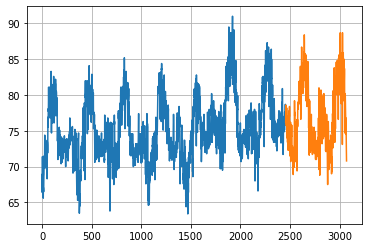

In [3]:
fig,ax=plt.subplots(1,1)
ax.plot(training_set['Temperature'])
ax.plot(testing_set['Temperature'])
ax.grid(True)

In [4]:
training_set=training_set.iloc[:,1:2].values
testing_set=testing_set.iloc[:,1:2].values

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc

In [6]:
#Feature Scaling 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
X_train = []
y_train = []
n_future = 4 # next 4 days temperature forecast
n_past = 30  # Past 30 days 
for i in range(0,len(training_set_scaled)-n_past-n_future+1):
    X_train.append(training_set_scaled[i : i + n_past , 0])     
    y_train.append(training_set_scaled[i + n_past : i + n_past + n_future , 0 ])
X_train , y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0] , X_train.shape[1], 1) )

In [8]:
X_train.shape

(2423, 30, 1)

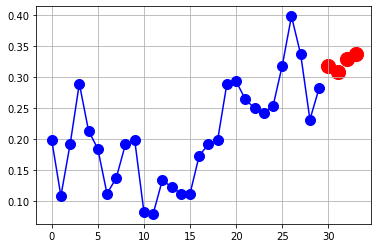

In [9]:
fig,ax=plt.subplots(1,1)
ax.plot(np.arange(0,len(X_train[0])),X_train[0],c='b',marker='o',ms=10)
ax.scatter([30,31,32,33],y_train[0],c='r',s=200)
ax.grid(True)

In [10]:
from keras.models import Sequential
from keras.layers import LSTM,Dense ,Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
model = keras.Sequential([(LSTM(units=30, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2]) )) ,
                          Dropout(0.2),
                          LSTM(units= 30 , return_sequences=True),
                          Dropout(0.2),
                          LSTM(units= 30 , return_sequences=True),
                          Dropout(0.2),
                          LSTM(units= 30),
                          Dropout(0.2),
                          Dense(units = n_future,    activation='linear')])

In [12]:
model.compile(loss='mean_squared_error',optimizer=keras.optimizers.Adam(0.01),metrics=['acc'])

In [13]:
history=model.fit(X_train, y_train, epochs=700, batch_size=64)

Epoch 1/700
38/38 [==============================] - 8s 39ms/step - loss: 0.0307 - acc: 0.2534
Epoch 2/700
38/38 [==============================] - 2s 40ms/step - loss: 0.0129 - acc: 0.2518
Epoch 3/700
38/38 [==============================] - 2s 41ms/step - loss: 0.0102 - acc: 0.2505
Epoch 4/700
38/38 [==============================] - 1s 37ms/step - loss: 0.0097 - acc: 0.2608
Epoch 5/700
38/38 [==============================] - 1s 39ms/step - loss: 0.0090 - acc: 0.2480
Epoch 6/700
38/38 [==============================] - 1s 39ms/step - loss: 0.0084 - acc: 0.2579
Epoch 7/700
38/38 [==============================] - 2s 42ms/step - loss: 0.0083 - acc: 0.2538
Epoch 8/700
38/38 [==============================] - 2s 40ms/step - loss: 0.0076 - acc: 0.2707
Epoch 9/700
38/38 [==============================] - 2s 45ms/step - loss: 0.0072 - acc: 0.2695
Epoch 10/700
38/38 [==============================] - 1s 38ms/step - loss: 0.0066 - acc: 0.2819
Epoch 11/700
38/38 [=============================

38/38 [==============================] - 1s 38ms/step - loss: 0.0058 - acc: 0.3364
Epoch 87/700
38/38 [==============================] - 1s 38ms/step - loss: 0.0058 - acc: 0.3190
Epoch 88/700
38/38 [==============================] - 1s 37ms/step - loss: 0.0060 - acc: 0.3219
Epoch 89/700
38/38 [==============================] - 2s 42ms/step - loss: 0.0059 - acc: 0.3388
Epoch 90/700
38/38 [==============================] - 1s 37ms/step - loss: 0.0064 - acc: 0.3174
Epoch 91/700
38/38 [==============================] - 1s 38ms/step - loss: 0.0061 - acc: 0.3157
Epoch 92/700
38/38 [==============================] - 1s 39ms/step - loss: 0.0060 - acc: 0.3149
Epoch 93/700
38/38 [==============================] - 1s 37ms/step - loss: 0.0062 - acc: 0.3273
Epoch 94/700
38/38 [==============================] - 1s 37ms/step - loss: 0.0061 - acc: 0.3289
Epoch 95/700
38/38 [==============================] - 1s 37ms/step - loss: 0.0059 - acc: 0.3079
Epoch 96/700
38/38 [==============================] -

38/38 [==============================] - 1s 39ms/step - loss: 0.0039 - acc: 0.3801
Epoch 171/700
38/38 [==============================] - 1s 36ms/step - loss: 0.0037 - acc: 0.3669
Epoch 172/700
38/38 [==============================] - 1s 36ms/step - loss: 0.0038 - acc: 0.3743
Epoch 173/700
38/38 [==============================] - 1s 36ms/step - loss: 0.0037 - acc: 0.3648
Epoch 174/700
38/38 [==============================] - 1s 36ms/step - loss: 0.0037 - acc: 0.3768
Epoch 175/700
38/38 [==============================] - 1s 36ms/step - loss: 0.0036 - acc: 0.3793
Epoch 176/700
38/38 [==============================] - 1s 36ms/step - loss: 0.0035 - acc: 0.3677
Epoch 177/700
38/38 [==============================] - 1s 36ms/step - loss: 0.0034 - acc: 0.3694
Epoch 178/700
38/38 [==============================] - 1s 36ms/step - loss: 0.0034 - acc: 0.3768
Epoch 179/700
38/38 [==============================] - 1s 36ms/step - loss: 0.0035 - acc: 0.3913
Epoch 180/700
38/38 [=======================

38/38 [==============================] - 3s 67ms/step - loss: 0.0021 - acc: 0.4354
Epoch 255/700
38/38 [==============================] - 3s 77ms/step - loss: 0.0020 - acc: 0.4404
Epoch 256/700
38/38 [==============================] - 3s 70ms/step - loss: 0.0020 - acc: 0.4494
Epoch 257/700
38/38 [==============================] - 3s 89ms/step - loss: 0.0020 - acc: 0.4466
Epoch 258/700
38/38 [==============================] - 3s 83ms/step - loss: 0.0021 - acc: 0.4416
Epoch 259/700
38/38 [==============================] - 3s 66ms/step - loss: 0.0021 - acc: 0.4494
Epoch 260/700
38/38 [==============================] - 3s 77ms/step - loss: 0.0021 - acc: 0.4474
Epoch 261/700
38/38 [==============================] - 3s 90ms/step - loss: 0.0020 - acc: 0.4441
Epoch 262/700
38/38 [==============================] - 3s 72ms/step - loss: 0.0022 - acc: 0.4519
Epoch 263/700
38/38 [==============================] - 3s 79ms/step - loss: 0.0022 - acc: 0.4482
Epoch 264/700
38/38 [=======================

38/38 [==============================] - 1s 39ms/step - loss: 0.0016 - acc: 0.5142
Epoch 339/700
38/38 [==============================] - 1s 38ms/step - loss: 0.0016 - acc: 0.5076
Epoch 340/700
38/38 [==============================] - 1s 38ms/step - loss: 0.0017 - acc: 0.5101
Epoch 341/700
38/38 [==============================] - 1s 39ms/step - loss: 0.0016 - acc: 0.5204
Epoch 342/700
38/38 [==============================] - 2s 40ms/step - loss: 0.0016 - acc: 0.5010
Epoch 343/700
38/38 [==============================] - 1s 39ms/step - loss: 0.0016 - acc: 0.5060
Epoch 344/700
38/38 [==============================] - 1s 38ms/step - loss: 0.0016 - acc: 0.5002
Epoch 345/700
38/38 [==============================] - 2s 44ms/step - loss: 0.0019 - acc: 0.4977
Epoch 346/700
38/38 [==============================] - 2s 46ms/step - loss: 0.0018 - acc: 0.4928
Epoch 347/700
38/38 [==============================] - 1s 38ms/step - loss: 0.0017 - acc: 0.5010
Epoch 348/700
38/38 [=======================

38/38 [==============================] - 1s 38ms/step - loss: 0.0015 - acc: 0.5419
Epoch 423/700
38/38 [==============================] - 1s 37ms/step - loss: 0.0014 - acc: 0.5307
Epoch 424/700
38/38 [==============================] - 1s 37ms/step - loss: 0.0015 - acc: 0.5386
Epoch 425/700
38/38 [==============================] - 1s 38ms/step - loss: 0.0014 - acc: 0.5444
Epoch 426/700
38/38 [==============================] - 2s 40ms/step - loss: 0.0014 - acc: 0.5295
Epoch 427/700
38/38 [==============================] - 1s 38ms/step - loss: 0.0014 - acc: 0.5353
Epoch 428/700
38/38 [==============================] - 1s 37ms/step - loss: 0.0015 - acc: 0.5419
Epoch 429/700
38/38 [==============================] - 1s 37ms/step - loss: 0.0014 - acc: 0.5192
Epoch 430/700
38/38 [==============================] - 1s 36ms/step - loss: 0.0014 - acc: 0.5328
Epoch 431/700
38/38 [==============================] - 1s 37ms/step - loss: 0.0014 - acc: 0.5456
Epoch 432/700
38/38 [=======================

38/38 [==============================] - 2s 41ms/step - loss: 0.0014 - acc: 0.5440
Epoch 507/700
38/38 [==============================] - 2s 40ms/step - loss: 0.0013 - acc: 0.5625
Epoch 508/700
38/38 [==============================] - 2s 43ms/step - loss: 0.0013 - acc: 0.5638
Epoch 509/700
38/38 [==============================] - 1s 37ms/step - loss: 0.0014 - acc: 0.5667
Epoch 510/700
38/38 [==============================] - 2s 40ms/step - loss: 0.0013 - acc: 0.5679
Epoch 511/700
38/38 [==============================] - 1s 39ms/step - loss: 0.0013 - acc: 0.5468
Epoch 512/700
38/38 [==============================] - 2s 40ms/step - loss: 0.0015 - acc: 0.5543
Epoch 513/700
38/38 [==============================] - 2s 44ms/step - loss: 0.0015 - acc: 0.5250
Epoch 514/700
38/38 [==============================] - 2s 63ms/step - loss: 0.0013 - acc: 0.5567
Epoch 515/700
38/38 [==============================] - 2s 45ms/step - loss: 0.0013 - acc: 0.5555
Epoch 516/700
38/38 [=======================

38/38 [==============================] - 2s 47ms/step - loss: 0.0012 - acc: 0.5865
Epoch 591/700
38/38 [==============================] - 1s 38ms/step - loss: 0.0013 - acc: 0.5737
Epoch 592/700
38/38 [==============================] - 1s 38ms/step - loss: 0.0013 - acc: 0.5584
Epoch 593/700
38/38 [==============================] - 1s 39ms/step - loss: 0.0012 - acc: 0.5823
Epoch 594/700
38/38 [==============================] - 1s 39ms/step - loss: 0.0012 - acc: 0.6054
Epoch 595/700
38/38 [==============================] - 1s 38ms/step - loss: 0.0012 - acc: 0.5881
Epoch 596/700
38/38 [==============================] - 1s 39ms/step - loss: 0.0013 - acc: 0.5947
Epoch 597/700
38/38 [==============================] - 2s 44ms/step - loss: 0.0013 - acc: 0.5708
Epoch 598/700
38/38 [==============================] - 2s 43ms/step - loss: 0.0013 - acc: 0.5716
Epoch 599/700
38/38 [==============================] - 2s 48ms/step - loss: 0.0013 - acc: 0.5778
Epoch 600/700
38/38 [=======================

38/38 [==============================] - 1s 36ms/step - loss: 0.0011 - acc: 0.5984
Epoch 675/700
38/38 [==============================] - 1s 36ms/step - loss: 0.0012 - acc: 0.6021
Epoch 676/700
38/38 [==============================] - 1s 36ms/step - loss: 0.0012 - acc: 0.6137
Epoch 677/700
38/38 [==============================] - 1s 36ms/step - loss: 0.0012 - acc: 0.6026
Epoch 678/700
38/38 [==============================] - 1s 36ms/step - loss: 0.0011 - acc: 0.5927
Epoch 679/700
38/38 [==============================] - 1s 36ms/step - loss: 0.0012 - acc: 0.6030
Epoch 680/700
38/38 [==============================] - 1s 36ms/step - loss: 0.0012 - acc: 0.6121
Epoch 681/700
38/38 [==============================] - 1s 36ms/step - loss: 0.0011 - acc: 0.5902
Epoch 682/700
38/38 [==============================] - 1s 37ms/step - loss: 0.0012 - acc: 0.5997
Epoch 683/700
38/38 [==============================] - 1s 38ms/step - loss: 0.0011 - acc: 0.5861
Epoch 684/700
38/38 [=======================

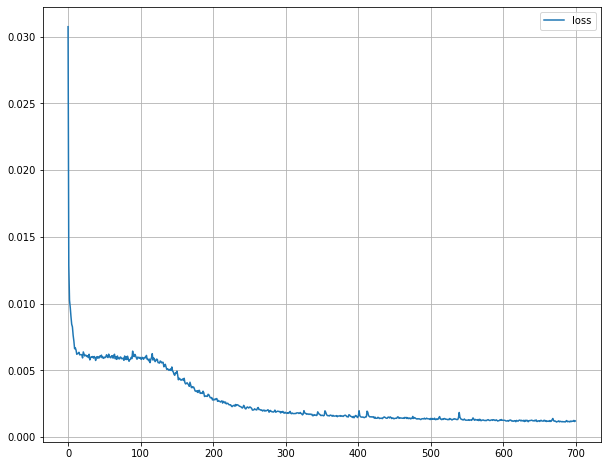

In [14]:
fig,ax=plt.subplots(1,1,figsize=(10,8))
ax.plot(history.history['loss'],label='loss')
ax.legend()
ax.grid(True)

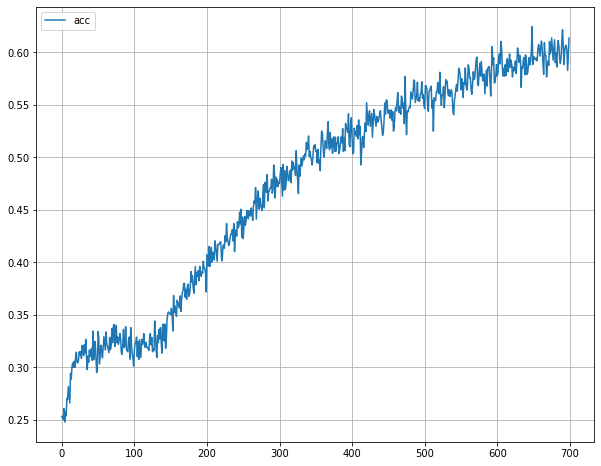

In [15]:
fig,ax=plt.subplots(1,1,figsize=(10,8))
ax.plot(history.history['acc'],label='acc')
ax.legend()
ax.grid(True)

# Testing


In [16]:
#Feature Scaling 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
testing_set_scaled = sc.fit_transform(testing_set)

In [17]:
X_test = []
y_test = []
n_future = 4 # next 4 days temperature forecast
n_past = 30 # Past 30 days 
for i in range(0,len(testing_set_scaled)-n_past-n_future+1):
    X_test.append(testing_set_scaled[i : i + n_past , 0])     
    y_test.append(testing_set_scaled[i + n_past : i + n_past + n_future , 0 ])
X_test , y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0] , X_test.shape[1], 1) )

In [18]:
y_pred = model.predict(X_test)

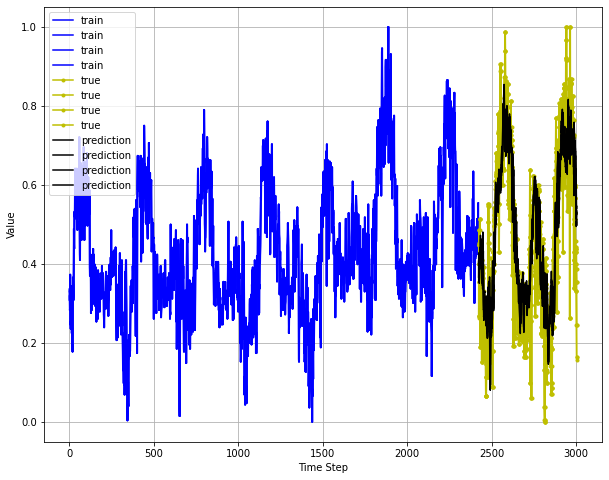

In [19]:
fig,ax=plt.subplots(1,1,figsize=(10,8))
ax.plot(np.arange(0, len(y_train)), y_train, 'b', label="train")
ax.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, c='y',marker='.', label="true")
ax.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'k', label="prediction")
ax.set_ylabel('Value')
ax.set_xlabel('Time Step')
ax.legend()
ax.grid(True)